In [1]:
import pandas as pd
import requests
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import glob
import os

# force to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [2]:
# variables to find race and driver, also cut off time to take out yellow flags and pit stop laps
race_id = 5546
driver_id = 0
lap_time_cutoff = 17

race_name = 'Daytona' + '_race.csv'
path = './data/2025_01_Daytona/'
filtered_lap_value = 70
filtered_speed_value = 110

In [3]:
# pull driver list from api
url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
json = requests.get(url).json()
driver_list = pd.json_normalize(json['laps'])
driver_list = driver_list[['FullName','Number','Manufacturer','RunningPos']]

# find driver name
driver = pd.json_normalize(json['laps'][driver_id])
driver = driver['FullName'].iloc[0]

# find race name and location
url = 'https://cf.nascar.com/cacher/2025/race_list_basic.json'
json = requests.get(url).json()
race = pd.json_normalize(json['series_1'])
race = race[['race_id', 'track_name', 'race_name']].set_index('race_id')
race = race.loc[race_id]
location = race.values[0]
name = race.values[1]
race = name + ' @ ' + location

# find list of race ids
race_list = pd.json_normalize(json['series_1'])
race_list = race_list[['race_id', 'track_name', 'race_name']].set_index('race_id')



print('\n' + driver + '\n')
print(race + '\n')
print(driver_list)
print(race_list)


William Byron

DAYTONA 500 @ Daytona International Speedway

                 FullName Number Manufacturer  RunningPos
0           William Byron     24          Chv           1
1           Tyler Reddick     45          Tyt           2
2        * Jimmie Johnson     84          Tyt           3
3           Chase Briscoe     19          Tyt           4
4    John Hunter Nemechek     42          Tyt           5
5             Alex Bowman     48          Chv           6
6             Ryan Blaney     12          Frd           7
7          Austin Cindric      2          Frd           8
8    * Justin Allgaier(i)     40          Chv           9
9          Chris Buescher     17          Frd          10
10       Michael McDowell     71          Chv          11
11             Erik Jones     43          Tyt          12
12          Daniel Suarez     99          Chv          13
13              Ty Dillon     10          Chv          14
14          Chase Elliott      9          Chv          15
15        

   Unnamed: 0  Lap  LapTime  LapSpeed  RunningPos  Number Manufacturer
0           0    0      NaN       NaN           5      24          Chv
1           1    1   52.135   172.629           5      24          Chv
2           2    2   47.861   188.045           5      24          Chv
3           3    3   47.966   187.633           4      24          Chv
4           4    4   47.957   187.668           2      24          Chv


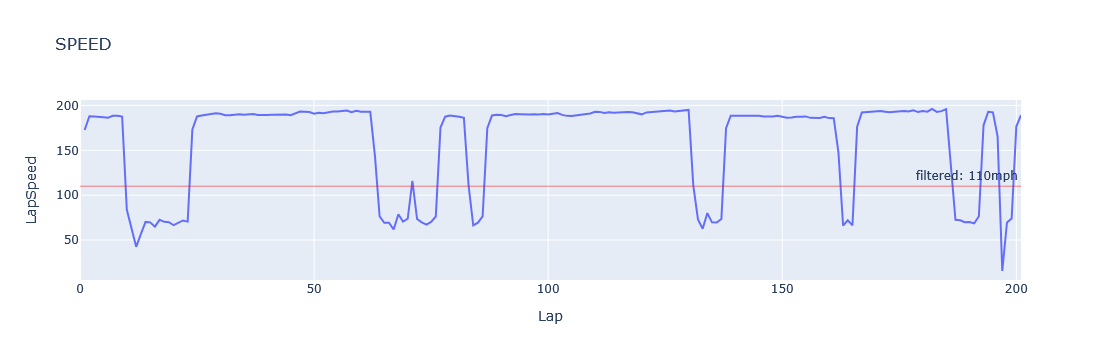

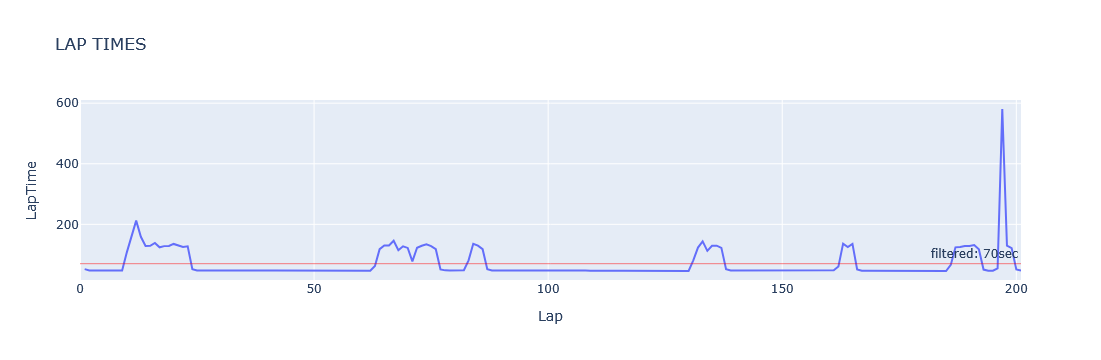

In [4]:
driver_csv = path + driver + '.csv'
df = pd.read_csv(driver_csv)
df = df.drop([11,21])
print(df.head(5))

# check lap_value to use
annotation = 'filtered: ' + str(filtered_speed_value) + 'mph'
fig = px.line(df, x='Lap', y='LapSpeed', title='SPEED')
fig.add_hline(y=filtered_speed_value, line_width=0.5, line_color='red', annotation_text=annotation)
fig.show()

# check speed_value to use
annotation = 'filtered: ' + str(filtered_lap_value) + 'sec'
fig = px.line(df, x='Lap', y='LapTime', title='LAP TIMES')
fig.add_hline(y=filtered_lap_value, line_width=0.5, line_color='red', annotation_text=annotation)
fig.show()

del df

# Create lap time files for each driver  (Driver Name.csv)

In [5]:
for i in np.arange(len(driver_list)):
    
    # Get data into dataframe
    url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
    json = requests.get(url).json()
    lap_times = pd.json_normalize(json['laps'][i]['Laps'])
    
    # Find driver name to see who we're dealing with
    driver_info = pd.DataFrame(json['laps'][i])
    driver_name = driver_info['FullName'][i]
    driver_name = driver_name.lstrip('* ').rstrip(' #(i)')
    lap_times['Number'] = driver_info['Number'][i]
    lap_times['Manufacturer'] = driver_info['Manufacturer'][i]
    
    # Save to .csv
    driver_name_csv = path + driver_name + '.csv'
    #lap_times.to_csv(driver_name_csv)

    print(driver_name)

print(lap_times.head())

William Byron
Tyler Reddick
Jimmie Johnson
Chase Briscoe
John Hunter Nemechek
Alex Bowman
Ryan Blaney
Austin Cindric
Justin Allgaier
Chris Buescher
Michael McDowell
Erik Jones
Daniel Suarez
Ty Dillon
Chase Elliott
Ty Gibbs
Riley Herbst
Ricky Stenhouse Jr.
Justin Haley
Kyle Larson
Cole Custer
Corey LaJoie
Austin Dillon
Denny Hamlin
Cody Ware
Brad Keselowsk
Todd Gilliland
Noah Gragson
Bubba Wallace
Carson Hocevar
Christopher Bell
Ryan Preece
Shane Van Gisbergen
Kyle Busch
Joey Logano
Zane Smith
Josh Berry
Martin Truex Jr.
Helio Castroneves
Ross Chastain
AJ Allmendinger
   Lap  LapTime LapSpeed  RunningPos Number Manufacturer
0    0      NaN     None          13     16          Chv
1    1   51.743  173.937          13     16          Chv
2    2   47.916  187.829          13     16          Chv
3    3   47.938  187.743          13     16          Chv
4    4   47.989  187.543          11     16          Chv


# Collect Summary info (Track_race.csv)

In [7]:
use_csv = path + '*[!_race][!_summary][!_500].csv'
csv_files = glob.glob(use_csv)

# Get data into dataframe
url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
json = requests.get(url).json()
driver_info = pd.json_normalize(json['laps'])
driver_info = driver_info[['FullName','Number','Manufacturer']]
driver_info = driver_info.rename(columns={'FullName': 'Driver_Name'})


df_list = []
i = 0

for file in csv_files:
    df = pd.read_csv(file)
    
    # Driver_Name
    Driver_Name = file.lstrip(path).rstrip('.csv')
    # Car number
    Car = driver_info['Number']
    # Manufacturer
    Manufacturer = driver_info['Manufacturer']
    # Start_Pos
    Start_Pos = df['RunningPos'].head(1).values
    # Lowest_Pos
    Lowest_Pos = df['RunningPos'].max()
    # Highest_Pos
    Highest_Pos = df['RunningPos'].min()
    # Ending_Pos
    Ending_Pos = df['RunningPos'].tail(1).values
    # Pos_Change
    Pos_Change = Start_Pos.astype(int) - Ending_Pos
    # Ave running pos
    ARP = round(df['RunningPos'].mean(), 4)
    # Fastest_Lap
    filtered_lap = [x for x in df['LapTime'] if x <= filtered_lap_value]
    Fastest_lap = min(filtered_lap)
    # Ave_Lap
    P50_lap = round(np.quantile(filtered_lap, 0.5), 4)
    # 95% quartile lap time
    P95_lap = round(np.quantile(filtered_lap, 0.95), 4)
    # Highest_Speed
    filtered_speed = [x for x in df['LapSpeed'] if x >= filtered_speed_value]
    Highest_speed = max(filtered_speed)
    # 50% quartile speed
    P50_speed = round(np.quantile(filtered_speed, 0.5), 4)
    # 95% quartile speed
    P95_speed = round(np.quantile(filtered_speed, 0.95), 4)

    # combine all into main race csv
    data = {'Driver_Name': Driver_Name,'Start_Pos': Start_Pos,'Lowest_Pos': Lowest_Pos,'Highest_Pos': Highest_Pos,'Ending_Pos': Ending_Pos,'Pos_Change': Pos_Change,'ARP': ARP,'Fastest_Lap': Fastest_lap,'P50_lap': P50_lap,'P95_lap': P95_lap,'Highest_speed': Highest_speed,'P50_speed': P50_speed,'P95_speed': P95_speed}
    # append dataframe to the list
    df_list.append(data)
    i = i + 1

race_data = pd.DataFrame(df_list)


# clean Start_Pos
clean_start_pos = race_data['Start_Pos'].astype(str)
clean_start_pos = clean_start_pos.str.strip('[]')

# clean Ending_Pos
clean_end_pos = race_data['Ending_Pos'].astype(str)
clean_end_pos = clean_end_pos.str.strip('[]')

# clean Pos_Change
clean_pos_change = race_data['Pos_Change'].astype(str)
clean_pos_change = clean_pos_change.str.strip('[]')

race_data['Start_Pos'] = clean_start_pos
race_data['Ending_Pos'] = clean_end_pos
race_data['Pos_Change'] = clean_pos_change

# merge with driver_info
merged_totals = driver_info.merge(race_data, on='Driver_Name')

# export as csv
export_csv = path + race_name
#merged_totals.to_csv(export_csv)

print(merged_totals.head())

            Driver_Name Number Manufacturer Start_Pos  Lowest_Pos  \
0         Tyler Reddick     45          Tyt        11          32   
1  John Hunter Nemechek     42          Tyt        18          38   
2           Ryan Blaney     12          Frd        16          32   
3        Chris Buescher     17          Frd         6          33   
4             Ty Dillon     10          Chv         7          38   

   Highest_Pos Ending_Pos Pos_Change      ARP  Fastest_Lap  P50_lap  P95_lap  \
0            2          2          9  13.8515       46.042  47.4265  50.9676   
1            3          5         13  20.2376       46.061  47.4740  50.9029   
2            1          1         15   9.1133       46.126  47.3690  51.0642   
3            2         10         -4  14.4802       45.918  47.3510  51.7725   
4            1         14         -7  22.0941       46.443  47.6910  51.9188   

   Highest_speed  P50_speed  P95_speed  
0        195.474   189.7290   194.1180  
1        195.393   189